# **CAPSTONE 2 - NYC TLC TRIP RECORD ANALYST DATA** ###

**BACKGROUND**

Taksi merupakan moda transportasi pilihat di tengah hiruk pikuk Kota New York, kami hadir sebagai solusi transportasi yang efisien dan terpercaya. Dengan fokus pada kecepatan dan kepuasan pelanggan, kami menyediakan layanan taksi yang siap mengantar Anda ke tujuan dengan cepat dan aman. Kami memahami pentingnya waktu bagi Anda, oleh karena itu kami terus meningkatkan sistem operasional kami agar Anda dapat dengan mudah mendapatkan taksi kapan pun dan di mana pun Anda berada.

**PROBLEM STATEMENT**

Perusahaan taksi di New York City ingin menemukan keseimbangan antara memenuhi permintaan tinggi pada jam sibuk dan mengoptimalkan penggunaan armada pada jam-jam sepi. Mereka ingin memastikan bahwa armada taksi selalu berada di lokasi yang tepat pada waktu yang tepat untuk memaksimalkan pendapatan. Namun, untuk mencapai tujuan ini, perusahaan perlu merancang strategi yang efektif dan mengembangkan sistem penempatan armada yang cerdas untuk menentukan harga argo terbaik.

Elemen-elemen kunci dalam pernyataan masalah ini:

- Optimalisasi penempatan armada: Mencari cara terbaik untuk menempatkan armada taksi agar sesuai dengan permintaan penumpang.
- Promosi: Mendesain strategi promosi yang efektif untuk menarik penumpang pada jam-jam sepi.
- Jam sibuk dan sepi: Memanfaatkan perbedaan permintaan pada jam-jam yang berbeda.
- Pendapatan: Memaksimalkan pendapatan perusahaan melalui optimasi penggunaan armada dan promosi.
- Investasi: Mempertimbangkan biaya promosi yang telah dikeluarkan oleh perusahaan.

Dengan merumuskan pernyataan masalah secara jelas, kita dapat mulai mencari solusi yang tepat untuk permasalahan ini.

## **DATA UNDERSTANDING** ##

**Data Extracting**

Data yang akan kita guanakan merupakan dataset **New York City TLC Trip Record Data Dictionary**. Dataset berisi record perjalanan taksi dari kota New York yang sapat di akses [click hear.](https://drive.google.com/file/d/1xhUlmGYo5VjiG1F9DnYPLiiKX8wWLHIZ/view?usp=drive_link)


In [513]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [514]:
NY = pd.read_csv("NYC TLC Trip Record.csv")
pd.set_option('display.max_columns', 500) # Untuk max display column digedein
pd.set_option('display.max_rows', 2000) # Untuk row display column digedein
pd.set_option('display.width', 1000)  # display lebar digedein max nya
pd.set_option('max_colwidth', 500) # max kolom lebar digedein
NY.head(2)

C:\Users\muhta\AppData\Local\Temp\ipykernel_22272\1072267382.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  NY = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00


Keterangan kolom Dataset : 
- VendorID                 :                  
- lpep_pickup_datetime     : Waktu Pick Up
- lpep_dropoff_datetime    : Waktu Drop Off
- store_and_fwd_flag       : Data yang di dikirimkan provider apa real time atau tidak (ini tidak mempengaruhi waktu Pick Up dan Drop Off)
- RatecodeID               : Jenis Akhir perjalanan, apa perjalanan reguler atau kebandara datau tempat khusus lainnya
- PULocationID             : Id Lokasi Pick Up dan zona kota new york
- DOLocationID             : Id Lokasi Drop OFF dan zona kota new york
- passenger_count          : Jumlah penumpang dalam 1 trip 
- trip_distance            : Jarak perjalanan
- fare_amount              : Tarif waktu dan jarak yang dihitung oleh meteran.
- extra                    : Biaya tambahan dan surcharges. Saat ini, ini hanya mencakup biaya tambahan $0.50 dan $1 untuk jam sibuk dan biaya malam
- mta_tax                  : Pajak MTA sebesar $0.50 yang secara otomatis dikenakan berdasarkan tarif yang digunakan
- tip_amount               : Jumlah tip yang secara otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk
- tolls_amount             : Jumlah biaya masuk tol
- ehail_fee                : Biaya perjalanan Khusus
- improvement_surcharge    : Biaya tambahan sebesar $0.30 yang dikenakan pada perjalanan yang dipanggil (hailed) pada saat flag drop. Biaya ini mulai dikenakan pada tahun 2015
- total_amount             :Total jumlah yang dibebankan kepada penumpang (Tidak termasuk tip tunai)
- payment_type             :Jenis Pembayaran
- trip_type                : Kode yang menunjukkan apakah perjalanan tersebut adalah panggilan jalanan (street hail) atau dispatch yang secara otomatis ditetapkan berdasarkan tarif yang digunakan tetapi dapat diubah oleh pengemudi
- congestion_surcharge     :Biaya kemacetan

### **Informasi from Dataset**
Pada tahap ini kita yang sudah memahami masalah perusahaan dan kebutuhan dari perusahaan membutuhkan memahami isi data yang kita miliki, untuk mengetahui apa saja yang yang dapat dianalisisi melalui dataset ini dalam membantu menemukan solusi.

**1) Dataframe taxi NYS TLC Trip***

In [515]:
# Colomnt dan baris data
NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [516]:
# mencari nilai unique dari masing-masing data yang tersedia (untuk memahami isi data)
# chek data uniq dari semua yang memiliki kode seperti PULocationID,DOLocationID, dan lain sebagainya
NY['VendorID'].unique()

array([2, 1])

- Dataset memiliki 68211 baris data dan 19 kolom/variable dengan 3 jenis tipe data:
    - float(14),interger(3), dan object (3) = dapat disimpulkan bahwa data yang "terbaca" lebih banyak numerikal
    - pada kondisi ini kita dapat mengetahui data mana yang kita butuhkan dan dapat kita kembangkan untuk untuk menunjang data atau argument kita

**2) penjelasan tentang data numerikal dan object**

In [517]:
NY.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


- VendorID,RatecodeID,PULocationID,DOLocationID harusnya berisi subject
- lpep_pickup_datetime & lpep_dropoff_datetime diubah ke date time untuk mempermudah analisis
- Maka dari itu penggunaan discibe bisa lebih di pusatkan apa hal hal tertentu saja

In [518]:
# Categorical Description Analysis
NY.describe(include='object')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


- jumlah data unik dalam kolom data unik masih masuk akal karena jika di lakukan sampling cek terdapat lokasi yang masih ber distrik sama
- jumlah count terdapat perbedaan hal tersebut bisa menunjukan apa ada nilai Nul atau memang data ada yang error
- pada tahap ini bisa dapat melakukan analisis lebih lanjut dengan mengubah beberapa tipe data sesuai kebutuhan

In [519]:
# Mengubah data numerikal menjadi object 
# RatecodeID
NY['RatecodeID'] = NY['RatecodeID'].astype(object)
# PULocationID
NY['PULocationID'] = NY['PULocationID'].astype(object)
# DOLocationID
NY['DOLocationID'] = NY['DOLocationID'].astype(object)
# payment_type
NY['payment_type'] = NY['payment_type'].astype(object)
# trip_type
NY['trip_type'] = NY['trip_type'].astype(object)


In [520]:
NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  object 
 5   PULocationID           68211 non-null  object 
 6   DOLocationID           68211 non-null  object 
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [521]:
NY.describe()


,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000
mean,1.863028,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,0.726748
std,0.343820,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,1.212836
min,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,-2.750000
25%,2.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,0.000000
50%,2.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,0.000000
75%,2.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.750000
max,2.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,2.750000


In [522]:
# Deskripsi kategorical values
NY.describe(include=object)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,payment_type,trip_type
count,68211,68211,63887,63887.0,68211,68211,63887.0,63877.0
unique,66575,66519,2,6.0,226,249,5.0,2.0
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N,1.0,74,75,1.0,1.0
freq,4,6,63579,62103.0,13257,3524,40686.0,62476.0


**3) melihat nilai NaN pada masing-masing data**

In [523]:
# nilai NaN ada sekitar 4324
# pada row ehail_fee tidak ada isinya
NY.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

1. Terdapat nilai NaN pada store_and_fwd_flag,RatecodeID,passenger_count,payment_type,trip_type, dan congestion_surcharge
2. pada baris "ehail_fee" tidak terdapat isi pada data tersebut, karena dari 68211 NaN data tersebut ada 68211
- Dari penjabaran diatas kita nantinya dapat memutuskan apa data tersebut ingin di drop atau tidak karena dapat di lihat apa data tersebut dapat menjadi outlier dalam analisis kita

**4) Mengecek apa terdapat data yang terduplikasi**

In [524]:
# tidak ada data duplikat
print('Jumlah data yang memiliki duplikat pada dataset ini adalah', NY.duplicated().sum())

Jumlah data yang memiliki duplikat pada dataset ini adalah 0


#### **Questions based on Dataset**

Berikut hal-hal yang perlu di analisis untuk menyelesaikan permasalahan dalam pemusatan armada:

**Lokasi dan Jam berapa yang bisa di kategorikan waktu ramai atau `Rush Hour`**
- Lokasi Pick Up teramai dan tersepi?
- Lokasi Drop Off teramai dan tersepi?
- Jam dengan traffic paling ramai dan tersepi?

### **DATA PREPARATION**

- **Merubah tipe data** kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi tipe data **datetime** yang menunjukan berapa lamanya waktu
- Mempersiapkan data yang di butuhkan untuk kebutuhan analisis dengan membuat colomnt baru yang tiperlukan

In [525]:
NY["lpep_pickup_datetime"] = pd.to_datetime(NY["lpep_pickup_datetime"])
NY["lpep_dropoff_datetime"] = pd.to_datetime(NY["lpep_dropoff_datetime"])

- mengubah data `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi durasi perjalanan menjaid menit dan mengubah menjadi nama hari dalam setahun untuk membantu dalam analisi yang lebih akurat per hari dan perjamnya

In [526]:
NY['Time_duration'] = (NY['lpep_dropoff_datetime'] - NY['lpep_pickup_datetime']).dt.total_seconds() / 60 

In [527]:
# membuat colomnt baru pickup day berdasarkan nama hari
NY['lpep_pickup_datetime'] = pd.to_datetime(NY['lpep_pickup_datetime'])
NY['pickup_day'] = NY['lpep_pickup_datetime'].dt.day_name()

In [528]:
NY['lpep_dropoff_datetime'] = pd.to_datetime(NY['lpep_dropoff_datetime'])
NY['dropoff_day'] = NY['lpep_dropoff_datetime'].dt.day_name()

In [529]:
NY['lpep_pickup_datetime'] = pd.to_datetime(NY['lpep_pickup_datetime'])
NY['PUHour'] = NY['lpep_pickup_datetime'].dt.hour
PUHour = NY.groupby('PUHour').size()
# kita melakukan grouping data untuk nantinya mengetahui pada hari apa dan jam berapa waktu sibuk yang nantinya membantu dalam menentukan promosi yang ingin kita lakukan
# pada kolom ini kita hanya menggunakan kolom pickup sebagai asumsi waktu sibuk, yang artinya dalam durasi satu jam itu dimana lokasi dan jam sibuk dengan pickup terbanyak
# mengapa dropoff tidak di konversikan juga? karena data tidak merepresentasikan jam sibuk pada lokasi tertentu.
# mengubah PUHour menjadi object untuk memudahkan perhitungan statistik yang seharusnya di count bukan di sum
NY['PUHour'] = NY['PUHour'].astype(object)

- Kita juga dapat membuat filtering yang nantinya membantu kita untuk tau apa di hari dan tahun tersebut merupakan hari kerja atau hari libur yang nantinya akan membantu dalam penilaian dalam menentukan strategi apa yang paling cocok untuk di lakukan

In [530]:
# Masukan daftar tanggal merah di New York tahun 2023
holiday_dates_ny_2023 = [
    "2023-01-01",  # Tahun Baru
    "2023-01-16",  # Martin Luther King Jr. Day
    "2023-02-20",  # Presidents' Day
    "2023-05-29",  # Memorial Day
    "2023-07-04",  # Independence Day
    "2023-09-04",  # Labor Day
    "2023-11-11",  # Veterans Day
    "2023-11-23",  # Thanksgiving Day
    "2023-12-25",  # Christmas Day
]
# Konversi daftar tanggal libur menjadi format datetime
holidays = pd.to_datetime(holiday_dates_ny_2023)
# Konversi kolom lpep_pickup_datetime menjadi datetime (jika belum)
NY['lpep_pickup_datetime'] = pd.to_datetime(NY['lpep_pickup_datetime'])
# Klasifikasikan hari (W = Hari Kerja, H = Akhir Pekan atau Libur)
NY['DayType'] = NY.apply(
    lambda row: 'H' if row['lpep_pickup_datetime'].date() in holidays.date or row['lpep_pickup_datetime'].dayofweek >= 5 else 'W',
    axis=1)


Dari syntax di atas didapati 5 kolom baru untuk membantu supporting argumnt dalam membuat keputusan, data yang di dapat dan fungsinya sebagian berikut:
1. Time_duration = untuk mengetahui berapa lama durasi perjalanan dari setiap trip
2. DayType = untuk mengetahui apa di hari tersebut working day (W) atau hari libur (H), untuk melihat perbandingan mana pengguna taksi paling banyak apa berbeda jauh atau tidak
3. Pickup_day dan dropoff_day untuk mengetahui di hari dan jam berapa ramai pada hari tersebut
4. PUHour = dari kolom tersebut kita nantinya dapat mengetahui di jam berpa permintaan terbanyak dengan filter hari dan waktu libur atau tidak

Pada data understanding kita sudah mengetahui bahwa PULocationID & DOLocationID dibaca sebagai interger, untuk memudahkan dalam visualisasi di tableau, kita akan mengubah location ID menjadi object yang berisi lokasi.
- Data lokasi dapat di download pada link [Zone Code](https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv) 
- nantinya kita akan bisa mengetahui dimanan lokasi pickup dan dropoff terramai pada jam sibuk untuk membantu dalam pemusatan armada
- **Merubah tipe data** kolom 'PULocationID' dan 'DOLocationID' **menjadi object**
- location ID di ubah menjadi object dengan isi tempat district yang nantinya akan untuk menjcari lokasi tersibuk dan tempat tujuan terbanyak


### **Menentukan jam sibuk**

C:\Users\muhta\AppData\Local\Temp\ipykernel_22272\1290749351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PUHour', data=NY, palette='coolwarm')


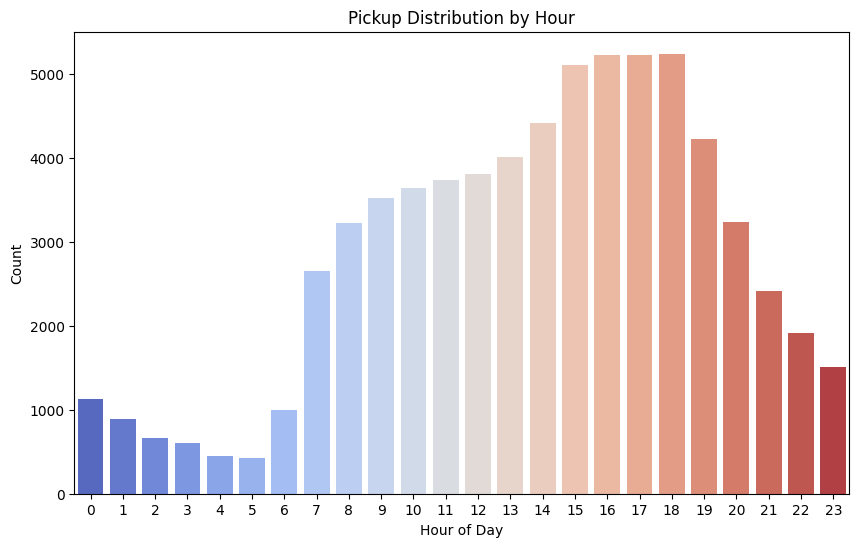

In [531]:
# Distribusi Waktu Pickup (PUHour) untuk menentukan range jam sibuk
plt.figure(figsize=(10, 6))
sns.countplot(x='PUHour', data=NY, palette='coolwarm')
plt.title('Pickup Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

- Dapat kita tarik kesimpulan bahwa jam sibuk rata-rata dalam satu minggu adalah di jam 15.00 - 18.00
- Melakukan pengelompokan Pickup di jam sibuk dan tidak

In [532]:
# Tambahkan kolom baru untuk menandai RushHour
NY['RushHour'] = NY['lpep_pickup_datetime'].apply(
    lambda dt: 'RushHour' if dt.time() >= pd.to_datetime('14:30').time() and dt.time() <= pd.to_datetime('18:00').time() else 'NonRushHour')

**Mengubah Location ID menjadi nama tempat untuk memudahkan dalam mengetahui lokasi mana yang nantinya akan membantu dalam analisis**

- Data lokasi dapat di akses pada link [taxi zone name](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)
- Dengan data tersebut nantinya output lokasi sudah berupa nama jalan yang memudahkan kita untuk menentukan lokasi secara detail

In [533]:
# data yang sudah di download kita load dulu kedalam file ini
lookup_data = pd.read_csv(r"C:\Users\muhta\OneDrive\Documents\OneDrive\Desktop\BELAJAR_DATA_ANALYS\taxi_zone_lookup.csv")
location_to_zone = dict(zip(lookup_data['LocationID'], lookup_data['Zone'])) # melakukan zip dan lookup data pada masing-masing location dan zona
# membuat kolom baru Pickup zone
NY['PUZone'] = NY['PULocationID'].map(location_to_zone)
# membuat kolom baru drop off zone
NY['DOZone'] = NY['DOLocationID'].map(location_to_zone)

location_to_zone = dict(zip(lookup_data['LocationID'], lookup_data['Borough'])) # melakukan zip dan lookup data pada masing-masing location dan zona
# membuat kolom baru Pickup zone
NY['PUBoroughZone'] = NY['PULocationID'].map(location_to_zone)
# membuat kolom baru drop off zone
NY['DOBoroughZone'] = NY['DOLocationID'].map(location_to_zone)
NY.head(2)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Time_duration,pickup_day,dropoff_day,PUHour,DayType,RushHour,PUZone,DOZone,PUBoroughZone,DOBoroughZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,11.016667,Sunday,Sunday,0,H,NonRushHour,Morningside Heights,Lincoln Square West,Manhattan,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,6.766667,Sunday,Sunday,0,H,NonRushHour,Bloomingdale,Central Park,Manhattan,Manhattan


## DATA CLEANSING
Pada data cleasning kita bisa menyesuaikan data yang sekiranya dapat menunjang proses analisis nantinya, ada beberapa colomnt yang dapat kita hapus atau drop, berikut adalah tahapan untuk melakukan analisis
1. Tentukan apa yang dianalisis, colomnt yang tidak di butuhkan dapat di drop
2. Data yang dirasa di butuhkan tapi memiliki nilai NaN sebaiknya di drop karena berpotensi menjadi outlier 
3. Mengecek outlier, pada nilai numerik sebaiknya di lakukan nilai outlier, nilai tersebut dapat mempengaruhi data


In [534]:
NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  object        
 5   PULocationID           68211 non-null  object        
 6   DOLocationID           68211 non-null  object        
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

**1) Drop & Filter Data**
- **Passanger_count**
    atau jumlah penumpang pada satu kali trip. Umumnya banyaknya penumpang tidak mempengaruhi argo pada taksi, pada beberapa kasus mungkin jumlah penumpang mempengaruhi jenis mobil pada taksi yang mengakibatkan perubahan argo meski tidak begitu signifikan. pada topik permasalahan yang kita cari jumlah armada bisa di asumsikan dengan jumlah banyak perjalanan bukan banyak penumpang.

In [535]:
# Drop Passanger_count
NY.drop('passenger_count', axis=1, inplace=True)

- **VendorID** berisi tempat server yang menyimpasn data perusahaan. tabel ini tidak memiliki mempengaruhi antara dimana dan kapan waktu sibuk dan lokasi sibuk, selian itu data tersebut tidak bisa menjadi supporting statment untuk tujuan yang kita inginkan

In [536]:
# Drop VendorID
NY.drop('VendorID', axis=1, inplace=True)

- **extra** pada colomnt extra, jika kita melihat isi dari kolom extra, terdapat angka yang berisitiope data float dengan isi (jika di lakukan unique) : 
array([ 1.  ,  0.5 ,  3.75,  0.  ,  3.25,  6.  ,  5.  ,  2.75,  5.5 , -1.  ,  2.5 ,  5.25,  7.5 , -2.5 , -0.5 , 12.5 ]).
Selain itu penjelasan tentang kolomnt extra tidak ada dalam penjelasan data dari purwadika, akan sulit mengasusmsikan data tersebut sebagai nilai apa. Merujuk pada tujuan kita yang ingin mencari lokasi dan jam sibuk yang membutuhkan armada nilai extra tidak dapat di jadikan supporting argument pada analisis kita.

In [537]:
# Drop extra
NY.drop('extra', axis=1, inplace=True)

- **tip_amount** atau pemberian tip kepada Driver adalah nilai yang uang tip yang di berikan kepada driver, pada colomnt ini tip tunai tidak termasuk kedalam sistem. niali tip_amount pada colomnt tidak akan mempengaruhi pemberian promo pada lokasi dan jam sibuk karena pemberian tip dilakukan secara sukarela oleh penumpang

In [538]:
# Drop tip_amount
NY.drop('tip_amount', axis=1, inplace=True)

- **tolls_amount** merupakan biaya yang di bebankan kepada penumpang jika melewari jalan tol, nilai ini tidak mempengaruhi penilaian yang kita lakukan, value dalam kolom tersebut umunya juga bernilai 0 yang sulit menjadi acuan untuk membantu dalam interpretasi lokasi, maka untuk menghindari missleading maka sebaiknya clomnt tersebut di hapus.

In [539]:
# Drop tolls_amount
NY.drop('tolls_amount', axis=1, inplace=True)

- **mta_tax** Pajak MTA sebesar $0.50 yang secara otomatis dikenakan berdasarkan tarif yang digunakan. colomnt tersebut dapat di hapus karena pasti sudah masuk secara otomatis dengan nilai yang di bebankan ke penumpang pada kolomnt total_amount. selain itu peraturan tersebut akan berbeda sesuai distrik sehingga tidak mempengaruhi analisis lokasi jam sibuk.

In [540]:
# Drop mta_tax
NY.drop('mta_tax', axis=1, inplace=True)

- **ehail_fee** pada penjelasan info diatas ehail_fee tidak memiliki nilai atau semua data ber isi NaN, sulit mengasumsikan value pada masing-masing trip, maka data dapat di hapus.

In [541]:
# Drop ehail_fee
NY.drop('ehail_fee', axis=1, inplace=True)

- **improvement_surcharge** nilai ini mulai dibebankan kepada penumpang di tahun 2015, improvement_surcharge berisi nilai yang dibayarkan oleh penumpang pada lokasi the flag atau lokasi yang dinilai minim sinyal. lokasi ini penting dalam memberikan inside untuk melakukan improvement bagi perusahaan untuk meningkatkan kepuasan publik, meskipun begitu nilai ini tidak mempengaruhi analisi kita yang sebelumnya sudah mempunyai lokasi dan flag location maka improvement_surcharge dapat di hapus. nilai ini dapat di pertahankan jika kita ingin menganalisi banyaknya biaya yang harus di keluarkan untuk melakukan improvement, banyak trip setiap tahunnya, denah lokasi, posisi dan masih banyak aspek lainnya.


In [542]:
# Drop Improvement_surcharge
NY.drop('improvement_surcharge', axis=1, inplace=True)

- **payment_type** jenis pembayaran tidak relevan pada tujuan analisis, karena banyak faktor penentu mengapa penumpang memilih metode bayar tersebut, jenis pembayaran yang tidak akan mempengaruhi pendapatan dan tidak mempengaruhi jumlah armada

In [543]:
# Drop payment_type
NY.drop('payment_type', axis=1, inplace=True)

- saat melakukan filtering data, data congestion_surcharge dilihat nilai unisquenya, didapati value dari nilai tersebut ada yang anomali karena menyajikan nilai minus jika di lakukan kode **NY['congestion_surcharge'].unique()**. hal tersebut merupakan anomali karena isi dari congestion_surcharge adalah biaya tambahan kemacetan yang harusnya bukan nilai minus, maka dari itu data yang dirasa akan digunakan akan di lihat untuk dinilai apa mungkin memiliki nilai minus atau tidak.

In [544]:
# kita mencari data yang berisi nilai numerikal pada kolom kita
numerical_columns = NY.select_dtypes(include=['number'])
# Selanjutnya cek apa ada nilai negatif di setiap kolom dengan melakukan looping
negative_values = {}
for col in numerical_columns.columns:
    count_negatives = (NY[col] < 0).sum()
    if count_negatives > 0:
        negative_values[col] = count_negatives
# lalu tampilkan hasil dengan memprint keterangan dan banyak nilai negatif pada setiap kolom
if negative_values:
    print("Kolom dengan nilai negatif:")
    for col, count in negative_values.items():
        print(f"{col}: {count} nilai negatif")
else:
    print("Tidak ada nilai negatif dalam kolom numerik.")


Kolom dengan nilai negatif:
fare_amount: 176 nilai negatif
total_amount: 179 nilai negatif
congestion_surcharge: 3 nilai negatif


- Dari informasi diatas kita mengetahui bahwa terdapat 3 colomnt yang memiliki nilai minus yang berpotensi menjadi anomali. pada tabel fare_amount, total_amount, dan congestion_surcharge tidak mungkin ada nilai minus karena merupakan pemasukan atau pendapatan yang di bayarkan oleh penumpang kepada supir. maka valeu tersebut harus kita ubah menjadi tidak minus

In [545]:
# mengubah nilai negatif pada fare_amount menjadi positif
NY['fare_amount'] = NY['fare_amount'].apply(lambda x: 0 if x < 0 else x)
# mengubah nilai negatif pada total_amount menjadi positif
NY['total_amount'] = NY['total_amount'].apply(lambda x: 0 if x < 0 else x)
# mengubah nilai negatif pada congestion_surcharger menjadi positif
NY['congestion_surcharge'] = NY['congestion_surcharge'].apply(lambda x: 0 if x < 0 else x)

In [546]:
NY['congestion_surcharge'].unique()
# jika di cek lagi deengan kode diatas tidak ada nilai minus pada ketiga colomnt tersebut

array([2.75, 0.  , 2.5 ,  nan])

Pada colomnt 'total_amount', 'fare_amount', 'Time_duration', 'trip_distance' terdapat nilai 0 yang tidak masuk akal, sebaggai contoh tidak mungkin naik taksi tampa membayar, atau tidak mungkin naik taksi tidak ada jarak atau durasi

In [547]:
# Menghapus baris di mana salah satu kolom memiliki nilai 0
columns_to_check = ['total_amount', 'fare_amount', 'Time_duration', 'trip_distance']

# Filter dataset untuk hanya menyimpan baris di mana semua kolom tidak bernilai 0
NY = NY[(NY[columns_to_check] != 0).all(axis=1)]

# Menampilkan informasi dataset setelah penghapusan
print(NY.info())

<class 'pandas.core.frame.DataFrame'>
Index: 64731 entries, 0 to 68210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   64731 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  64731 non-null  datetime64[ns]
 2   store_and_fwd_flag     60565 non-null  object        
 3   RatecodeID             60565 non-null  object        
 4   PULocationID           64731 non-null  object        
 5   DOLocationID           64731 non-null  object        
 6   trip_distance          64731 non-null  float64       
 7   fare_amount            64731 non-null  float64       
 8   total_amount           64731 non-null  float64       
 9   trip_type              60555 non-null  object        
 10  congestion_surcharge   60565 non-null  float64       
 11  Time_duration          64731 non-null  float64       
 12  pickup_day             64731 non-null  object        
 13  dropof

**2) Handling Missing Value**
- Awal analsiis kita sudah mengetahui beberapa missing value dari beberapa colomnt, setelah di lakukan pengecekan data dengan mendrop dan leihat data yang tidak di butuhkan kita melakukan pengecekan ulang untuk mengetahui clomnt apa saja yang memiliki nilai NaN dalam barisnya.

In [548]:
NY.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4166
RatecodeID               4166
PULocationID                0
DOLocationID                0
trip_distance               0
fare_amount                 0
total_amount                0
trip_type                4176
congestion_surcharge     4166
Time_duration               0
pickup_day                  0
dropoff_day                 0
PUHour                      0
DayType                     0
RushHour                    0
PUZone                     29
DOZone                    130
PUBoroughZone              24
DOBoroughZone             196
dtype: int64

- Pada Informasi diatas data NaN pada PUZone dan DOZone mungkin saya lokasinya tidak diketahui, hal tersebut dapat terjadi pada beberapa faktor dalam kasus ini, pada lokasi NaN pada dua data tersebut diketahu ada daerah yang berasal dari luar kota Newyork selain itu ada tempat terpencil yang memiliki sinyal kurang bagus atau tidak terdata dalam database. maka dari itu nilai NaN pada dua colomnt tersebut akan di ubah menjadi "unknown" string yang berarti trip yang tidak di ketahui lokasi Pick Up atau Drop Off nya. lokasi unknown dapat menjadi masukan nantinya bagi perusahaan dalam pemetaan lokasi
- unkown di Boroughzone

In [549]:
# Change NaN menjadi 'unknown' di coloumnt PUZone dan DOZone
NY['PUZone'] = NY['PUZone'].fillna('unknown')
NY['DOZone'] = NY['DOZone'].fillna('unknown')

In [550]:
# Change NaN menjadi 'unknown' di coloumnt PUBoroughZone DOBoroughZone
NY['PUBoroughZone'] = NY['PUBoroughZone'].fillna('unknown')
NY['DOBoroughZone'] = NY['DOBoroughZone'].fillna('unknown')

In [551]:
# Calculate Null
data_null = NY.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
# Calculate Percentage Null
data_null['null percentage'] = data_null['null count'].apply(lambda x: x/(len(data_null)*100))
data_null

,variable,null count,null percentage
0,lpep_pickup_datetime,0,0.000000
1,lpep_dropoff_datetime,0,0.000000
2,store_and_fwd_flag,4166,1.983810
3,RatecodeID,4166,1.983810
4,PULocationID,0,0.000000
5,DOLocationID,0,0.000000
6,trip_distance,0,0.000000
7,fare_amount,0,0.000000
8,total_amount,0,0.000000
9,trip_type,4176,1.988571


Dari informasi diatas dapat di pahami bahwa terdapa nilai NaN pada colomnt store_and_fwd_flag, RatecodeID, trip_type, dan congestion_surcharge.
pada keempat data tersebut terdapat pertimbangan yang di lakukan untuk menghapus kolomnya seperti sebagian berikut :
1. store_and_fwd_flag (2.162% NaN):
Kolom ini menunjukkan apakah data perjalanan disimpan sementara di memori sebelum dikirimkan. ada sekitar 2.16% nilainya kosong, kolom ini sebaiknya di hapus, di dataset kita memiliki PUZone dan DOZone, kita tidak dapat mengasumsikan jam dan tanggal trip tersebut sebaik real time atau bukan kecuali berada di lokasi unkonw di kolom PUZone dan DOZone. maka sebaiknya data ini di hapus karena dapat merubah peta lokasi dari daerah aman saja yang terverifikasi not real time data.

2. RatecodeID (2.162% NaN):
Kolom ini menunjukkan kode tarif perjalanan pada lokasi tujaun akhir tertentu (1,2,3,4,5,6) yang masing-masing memiliki tujuan tersendiri. Nilai NaN pada kolom ini dapat kita hapus karena alasan isi berisi ID code lokasi yang tidak dapat di asumsikan, meskipun begitu kita memiliki DOZone yang dapat di asumsikan dimana Drop Off tersebut dilakukan atau mengubah lokasi ini menjadi nilai 0. dengan kedua pertimbangan tersebut sebaiknya Colomnt ini di hapus karena jika lokasi DO ternyata Unknown maka dapat menjadi outlier dan merubah data lokasi di jam sibuk

3. trip_type (2.167% NaN):
Kolom ini menunjukkan jenis perjalanan dengan kode 1 = street-hall dan 2 = dispatch. Sama seperti RatecodeID, sebaiknya nilai in dihapus karena sulit mengasumsikan data nya, selain itu nantinya kita akan sulit dalam filtering data yang nantinya jika kita ingin apa tip tersebut street hall atau dispatch. selain itu kenapa di hapus karena sulit mengasumsikan tarif karena dispatch dapat diubah tarifnya sesuai dengan kesepakatan oleh supir meski tarif sudah otomatis tertera(seperti menggunakan taksi online)

4. congestion_surcharge (2.162% NaN):
data yang menunjukkan biaya tambahan akibat kemacetan sebenarnya dapat diganti nilai NaN dengan 0, jika masuk akal secara bisnis (misalnya, jika perjalanan tidak dikenakan biaya kemacetan). akan tetapi pada beberapa trip yang kita tidak dapat menyimpulakan apa lokasi tersebut apa macet atau tidak karena dapat mempengaruhi total tarif maka sebaiknya di drop.

dapat di simpulkan bahwa keempat datar tersebut yang memiliki valeu NaN dapat di drop dengan pertimbagan di atas.

In [552]:
NY.dropna(subset=['store_and_fwd_flag'], inplace=True)

In [553]:
NY.dropna(subset=['trip_type'], inplace=True)
NY.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
trip_distance            0
fare_amount              0
total_amount             0
trip_type                0
congestion_surcharge     0
Time_duration            0
pickup_day               0
dropoff_day              0
PUHour                   0
DayType                  0
RushHour                 0
PUZone                   0
DOZone                   0
PUBoroughZone            0
DOBoroughZone            0
dtype: int64

**3) Handling Outlier**
- Menentukan teknik apa yang dapat di lakukan untuk membantu dalam manangani outlier pada kasus ini cukup tricky karena nilai outlier merupakan fenomena yang wajar yang terjadi dengan berbagai faktor seperti human error atau hilang sinyal. seperti yang kita lakukan tadi mengubah nilai minus yang mungkin terjadi karena salah input atau lokasi pick up dan drop off yang bernilai NaN yang diubah menjadi unknown yang dapat memberikan informasi untuk melakukan improvement. apa bisa outlier di hapus dapat menghilangkan informasi penting yang terjadi karena mungkin nilai outlier yang banyak.
- kita dapat melakukan contoh pengecekan seperti berikut : 

In [554]:
# outlier pada PU date time
Q1 = NY['trip_distance'].describe()['25%']
Q3 = NY['trip_distance'].describe()['75%']
IQR = Q3-Q1

lower = Q1 - (3*IQR)
upper = Q3 + (3*IQR)
outlier = NY[(NY['trip_distance'] < lower) | (NY['trip_distance'] > upper)][['trip_distance']]
outlier_terbesar = outlier['trip_distance'].max() 
print('jumlah outlier:', len(outlier))
print('Persentase outlier dalam data:', len(outlier)/NY.shape[0]*100, '%')
print('Outlier terbesar:', outlier_terbesar) 

jumlah outlier: 1770
Persentase outlier dalam data: 2.9229625959871193 %
Outlier terbesar: 1571.97


setelah di lakukan pengecekan outlier hanya terjadi pada upper yang memiliki 1 nilai paling besar yang tidak masuk akal hal tersebut dapat kita take out

In [555]:
# Menghapus baris yang termasuk outlier
NY = NY[(NY['trip_distance'] <= upper)]

- pada 'trip_distance' hanya satu yang tidak masuk akal, setelahnya yang tertinggi hanya 66 mils jadi tidak perlu di hapus

In [556]:
# outlier pada pendapatan (numerik)
Q1 = NY['total_amount'].describe()['25%']
Q3 = NY['total_amount'].describe()['75%']
IQR = Q3-Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
outlier = NY[(NY['total_amount'] < lower) | (NY['total_amount'] > upper)][['total_amount']]
outlier_terbesar = outlier['total_amount'].max() 
print('jumlah outlier:', len(outlier))
print('Persentase outlier dalam data:', len(outlier)/NY.shape[0]*100, '%')
print('Outlier terbesar:', outlier_terbesar) 

jumlah outlier: 2297
Persentase outlier dalam data: 3.907459385897763 %
Outlier terbesar: 456.0


In [557]:
# outlier Extream pada pendapatan (numerik)
Q1 = NY['fare_amount'].describe()['25%']
Q3 = NY['fare_amount'].describe()['75%']
IQR = Q3-Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
outlier = NY[(NY['fare_amount'] < lower) | (NY['fare_amount'] > upper)][['fare_amount']]
outlier_terbesar = outlier['fare_amount'].max() 
print('jumlah outlier:', len(outlier))
print('Persentase outlier dalam data:', len(outlier)/NY.shape[0]*100, '%')
print('Outlier terbesar:', outlier_terbesar) 

jumlah outlier: 3158
Persentase outlier dalam data: 5.372118737773241 %
Outlier terbesar: 455.0


In [558]:
# outlier Extream pada pendapatan (numerik)
Q1 = NY['Time_duration'].describe()['25%']
Q3 = NY['Time_duration'].describe()['75%']
IQR = Q3-Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
outlier = NY[(NY['Time_duration'] < lower) | (NY['Time_duration'] > upper)][['Time_duration']]
outlier_terbesar = outlier['Time_duration'].max() 
print('jumlah outlier:', len(outlier))
print('Persentase outlier dalam data:', len(outlier)/NY.shape[0]*100, '%')
print('Outlier terbesar:', outlier_terbesar) 

jumlah outlier: 2399
Persentase outlier dalam data: 4.080973037339457 %
Outlier terbesar: 1438.9333333333334


- pada outlier lain tidak di hapus karena tidak mempengaruhi tujuan analisis karena analisi yang bofokus pada lokasi dan jam
- time duration dihapus karena ada regresi dan penilaian yang di ambil pada grafik tersebut

In [559]:
# Menghapus baris yang termasuk outlier
NY = NY[(NY['Time_duration'] >= lower) & (NY['Time_duration'] <= upper)]

# Menampilkan informasi dataset setelah penghapusan
print('Data setelah menghapus outlier:')
print(NY.info())

Data setelah menghapus outlier:
<class 'pandas.core.frame.DataFrame'>
Index: 56386 entries, 0 to 63886
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   56386 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  56386 non-null  datetime64[ns]
 2   store_and_fwd_flag     56386 non-null  object        
 3   RatecodeID             56386 non-null  object        
 4   PULocationID           56386 non-null  object        
 5   DOLocationID           56386 non-null  object        
 6   trip_distance          56386 non-null  float64       
 7   fare_amount            56386 non-null  float64       
 8   total_amount           56386 non-null  float64       
 9   trip_type              56386 non-null  object        
 10  congestion_surcharge   56386 non-null  float64       
 11  Time_duration          56386 non-null  float64       
 12  pickup_day             56386 non-

jika kita menghapus outlier pada  beberapa data dapat mempengaruhi informasi yang di dapat. selain itu isi outlier sperti contoh pada data total_amount mungkin terjadi karena beberapa kondisi seperti lokasi macet, pajank tambahan, jarak perjalanan yang jauh dan lain sebagainya. Oleh karena itu, outlier tidak akan dihapus. selain itu terdapat trip yang biaya yang tidak mengikuti argo seperti 5 = tarif yang dinegosiasikan dan 6 = perjalana grop

**4) mengubah colomnt congestion_surcharge menjadi code**

pada colomnt congestion_surcharge dapat membantu mengidentifikasi waktu dan lokasi di mana biaya tambahan kemacetan berlaku, yang biasanya mencerminkan jam sibuk, maka dengan itu kita dapat mengubah menjadi code dengan aturan jika value lebih dari 0 (Value > 0) maka dapat diasumsikan arah lokasi antara pickup dan dropoff rawan kemacetan.

In [560]:
NY['traffic_congestion'] = np.where(NY['congestion_surcharge'] > 0, 'Congested', 'Not Congested')
NY.head(3
        )

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_type,congestion_surcharge,Time_duration,pickup_day,dropoff_day,PUHour,DayType,RushHour,PUZone,DOZone,PUBoroughZone,DOBoroughZone,traffic_congestion
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,2.58,14.9,24.18,1.0,2.75,11.016667,Sunday,Sunday,0,H,NonRushHour,Morningside Heights,Lincoln Square West,Manhattan,Manhattan,Congested
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.81,10.7,15.84,1.0,0.00,6.766667,Sunday,Sunday,0,H,NonRushHour,Bloomingdale,Central Park,Manhattan,Manhattan,Not Congested
3,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.30,6.5,10.20,1.0,0.00,5.816667,Sunday,Sunday,0,H,NonRushHour,Central Harlem,Upper West Side North,Manhattan,Manhattan,Not Congested


In [601]:
NY.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,fare_amount,total_amount,congestion_surcharge,Time_duration
count,56386,56386,56386.000000,56386.000000,56386.000000,56386.000000,56386.000000
mean,2023-01-16 22:30:40.322704128,2023-01-16 22:42:16.056485632,2.236584,13.878503,18.883131,0.731064,11.595563
min,2022-12-09 14:10:49,2022-12-09 14:22:26,0.010000,0.010000,1.010000,0.000000,0.016667
25%,2023-01-09 12:11:25.750000128,2023-01-09 12:28:39.249999872,1.160000,8.600000,12.480000,0.000000,7.016667
50%,2023-01-17 08:47:39.500000,2023-01-17 09:02:05,1.780000,12.100000,16.770000,0.000000,10.566667
75%,2023-01-24 16:11:00.249999872,2023-01-24 16:21:33.750000128,2.810000,17.000000,23.350000,2.750000,15.200000
max,2023-01-31 23:58:23,2023-02-01 00:07:16,9.040000,455.000000,456.000000,2.750000,29.433333
std,NaN,NaN,1.593842,7.903252,9.733317,1.214842,6.088681


In [599]:
NY.describe(include=object)

,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,trip_type,pickup_day,dropoff_day,PUHour,DayType,RushHour,PUZone,DOZone,PUBoroughZone,DOBoroughZone,traffic_congestion
count,56386,56386.0,56386,56386,56386.0,56386,56386,56386,56386,56386,56386,56386,56386,56386,56386
unique,2,5.0,183,239,2.0,7,7,24,2,2,182,238,7,7,2
top,N,1.0,74,75,1.0,Tuesday,Tuesday,18,W,NonRushHour,East Harlem North,East Harlem South,Manhattan,Manhattan,Not Congested
freq,56150,55569.0,12407,3279,55696.0,9300,9294,4556,41147,41509,12407,3279,35056,34863,41395


**5) Final Dataset**

**Rechek duplicate**

In [561]:
print('Jumlah data yang memiliki duplikasi pada dataset :',NY.duplicated().sum())

Jumlah data yang memiliki duplikasi pada dataset : 0


**Rechek Null**

In [562]:
data_null = NY.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
data_null['null percentage'] = data_null['null count'].apply(lambda x: x/(len(data_null)*100))
data_null

,variable,null count,null percentage
0,lpep_pickup_datetime,0,0.0
1,lpep_dropoff_datetime,0,0.0
2,store_and_fwd_flag,0,0.0
3,RatecodeID,0,0.0
4,PULocationID,0,0.0
5,DOLocationID,0,0.0
6,trip_distance,0,0.0
7,fare_amount,0,0.0
8,total_amount,0,0.0
9,trip_type,0,0.0


**Rechek Kesesuaian Tipe Data**

In [563]:
NY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56386 entries, 0 to 63886
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   56386 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  56386 non-null  datetime64[ns]
 2   store_and_fwd_flag     56386 non-null  object        
 3   RatecodeID             56386 non-null  object        
 4   PULocationID           56386 non-null  object        
 5   DOLocationID           56386 non-null  object        
 6   trip_distance          56386 non-null  float64       
 7   fare_amount            56386 non-null  float64       
 8   total_amount           56386 non-null  float64       
 9   trip_type              56386 non-null  object        
 10  congestion_surcharge   56386 non-null  float64       
 11  Time_duration          56386 non-null  float64       
 12  pickup_day             56386 non-null  object        
 13  dropof

**Exporting Final Dataset**

In [564]:
NY.to_csv("NY TLC Clean FIX.csv", index=False)

# Goal

**Sebagai data scientist di sebuah perusahaan taxi**, kita diminta untuk melakukan analisa di hari apakah, jam berapakah, dan tujuan lokasi manakah yang nantinya akan menjadi lokasi Pick Up tertinggi di jam "sibu" tersebut

1. Analyize data:
    - feature: `DayType & pickup_day`
    - target: `PUHour & PUZone `
2. Melakukan 'analisis Deskriptif' untuk menentukan lokasi dan jam sibuk
    - Menentukan 10 lokasi terbanyak : PUZone 
    - Menentukan rata-rata jam Pick Up tersibuk : PUHour
    - filter = DayType & pickup_day
    - Dasboard tableau = tabel utama
        - menampilkan jam sibuk di hari tertentu : PUHour, filter : DayType & pickup_day
        - menampilkan 10 lokasi pickup teramai perjam : pickup_day & PUZone
    - Dasboard tableau = Supporting tabel 
        - 10 lokasi termacet = DOZone & traffic_congestion
        - Perbandingan jam sibuk di hari kerja dan libur = DayType & PUHour 
        - field map lokasi by hour = PUZone & PUHour


In [565]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

#### **ANALYSIS AND VISUALISASI DATA**

In [566]:
NY.head(1)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_type,congestion_surcharge,Time_duration,pickup_day,dropoff_day,PUHour,DayType,RushHour,PUZone,DOZone,PUBoroughZone,DOBoroughZone,traffic_congestion
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,2.58,14.9,24.18,1.0,2.75,11.016667,Sunday,Sunday,0,H,NonRushHour,Morningside Heights,Lincoln Square West,Manhattan,Manhattan,Congested


## Deskriptif

### Perbedaan Rush Hour dan tidak Rush Hour
**Jumlah Rush Hour secara keseluruhan**

dari 63877 perjalanan 16888 lokasi dimerupakan Rush Hour

In [567]:
NY.groupby('RushHour')[['RushHour']].count()

,RushHour
RushHour,
NonRushHour,41509
RushHour,14877


Text(0.5, 1.0, 'Jumalah Perjalanan dalam Rush Hour')

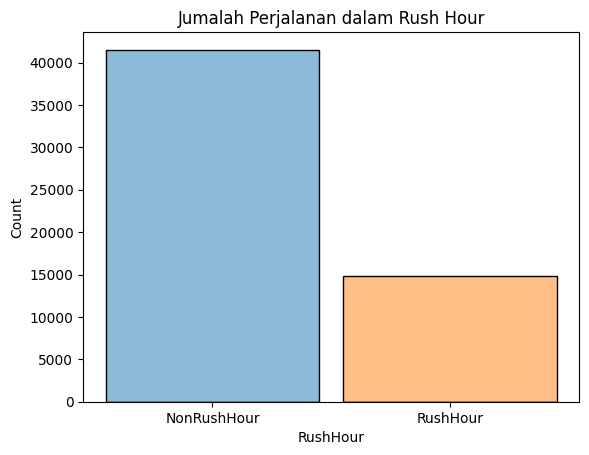

In [590]:
# Perbandingan Rush Hour dan tidak Rush Hour
sns.histplot(data=NY, x='RushHour', hue='RushHour', legend=None, shrink=0.9)
plt.title('Jumalah Perjalanan dalam Rush Hour')

10 lokasi pick up terbanyak : pada lokasi ini jika 1 jam sebelum rush hour maka kita dapat memberikan `diskon` untuk menuju penumpang yang menuju `lokasi pick up terbanyak`

C:\Users\muhta\AppData\Local\Temp\ipykernel_22272\3530021553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_counts.index[:10], y=pickup_counts.values[:10], palette='viridis')


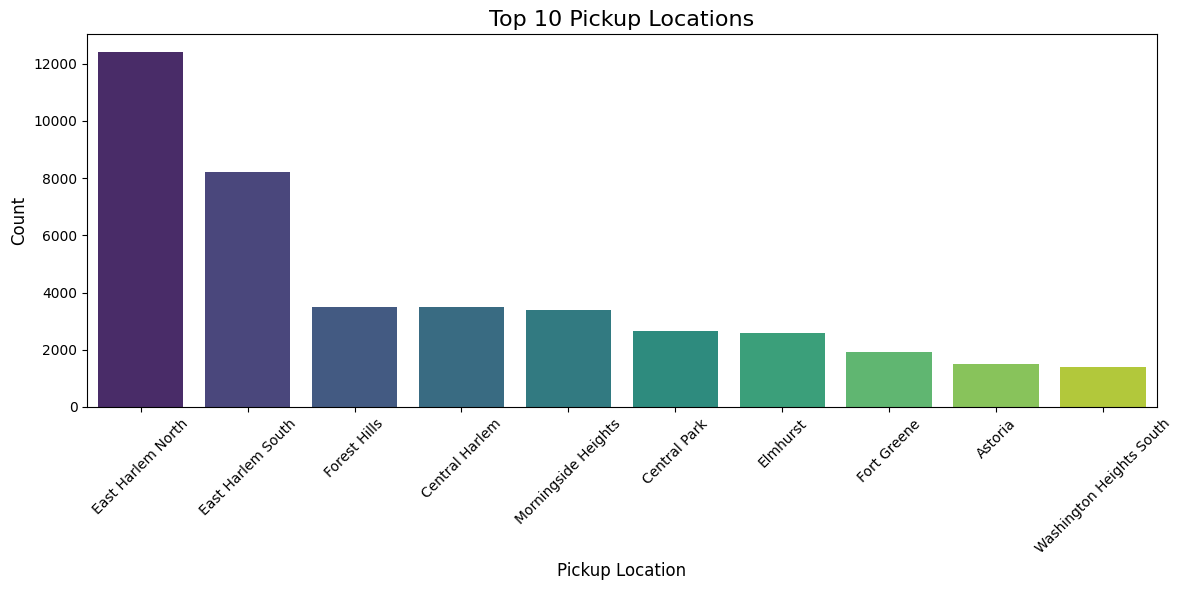

In [569]:
# Top 10 Lokasi Pickup Tersibuk
pickup_counts = NY['PUZone'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=pickup_counts.index[:10], y=pickup_counts.values[:10], palette='viridis')
plt.title('Top 10 Pickup Locations',fontsize=16)
plt.xlabel('Pickup Location',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


Top 10 drop off teramai: saat rush hour 1 jika lokasi drop off penumpang menuju lokasi tersebut kita dapat memberikan `harga normal` sesuai jam sibuk

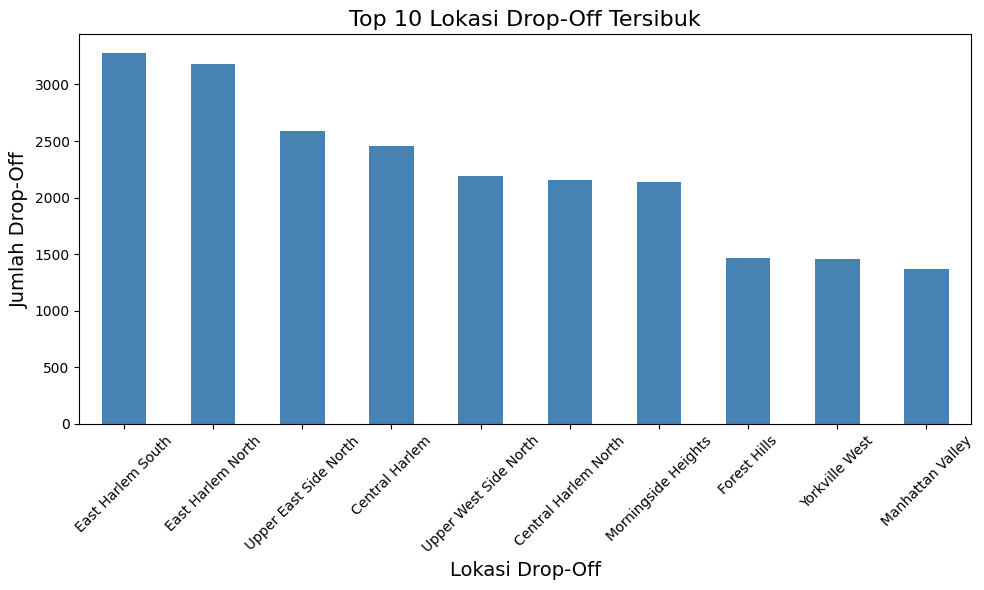

In [570]:
# Top 10 Drop Off Tersibuk
dropoff_counts_top = NY['DOZone'].value_counts().head(10)
plt.figure(figsize=(10, 6))
dropoff_counts_top.plot(kind='bar', color='steelblue')
plt.title('Top 10 Lokasi Drop-Off Tersibuk', fontsize=16)
plt.xlabel('Lokasi Drop-Off', fontsize=14)
plt.ylabel('Jumlah Drop-Off', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 lokasi tersepi: di saat rush hour jam jika penumpang menuju lokasi lokasi tersepi kita dapat memberikan `harga yang lebih mahal`, karena nantinya di lokasi tersebut dapat di asumsukan sulit mendapatkan penumpang kembali

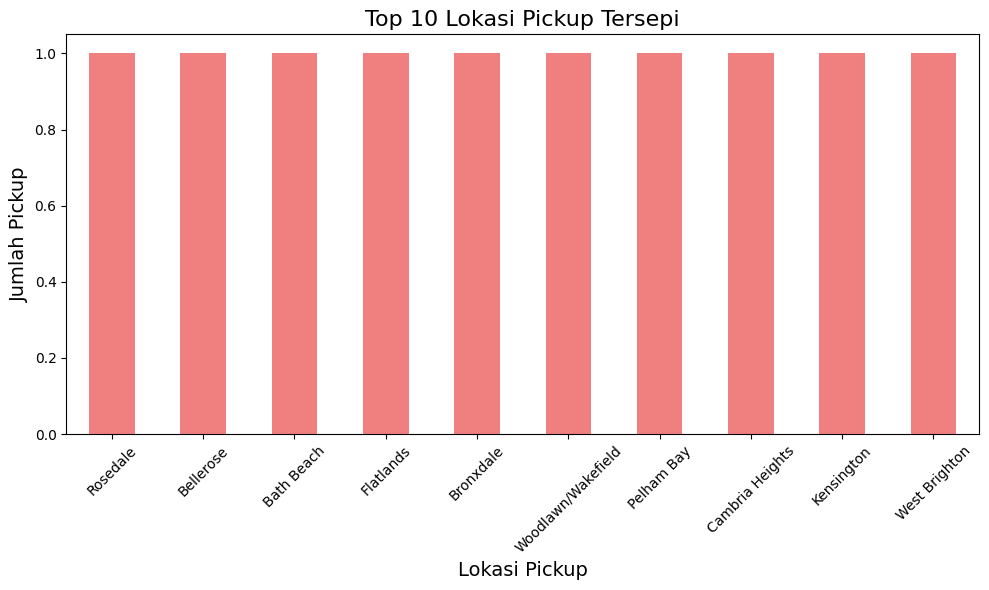

In [571]:
# Top 10 pickup tersepi
pickup_counts_least = NY['PUZone'].value_counts().tail(10)
plt.figure(figsize=(10, 6))
pickup_counts_least.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Lokasi Pickup Tersepi', fontsize=16)
plt.xlabel('Lokasi Pickup', fontsize=14)
plt.ylabel('Jumlah Pickup', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 lokasi dropof tersepi: penumpang yang bertujuan di lokasi drop off di 2 jam sebelum rush hour dapat di berikan harga normal, akan tetapi bila penumpang dengan tujuan di bawah berangkan 1 jam hingga rush hour di mulai maka akan di berikan harga yang lebih mahal.

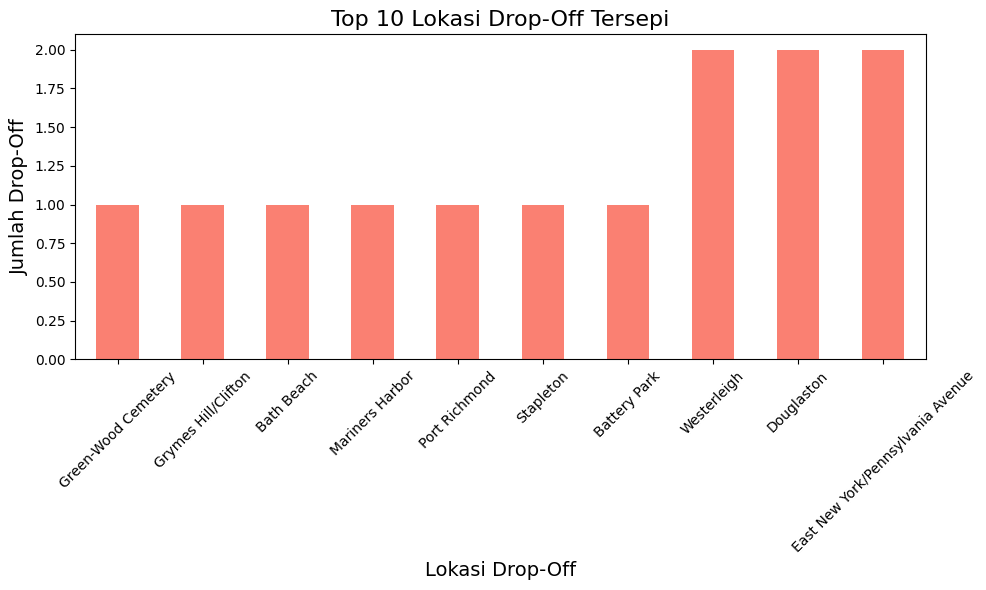

In [572]:
# Top 10 Lokasi Drop Off tersepi : kita bisa membuat harga lebih mahal jika di turunkan pada lokasi tersebut
dropoff_counts_bottom = NY['DOZone'].value_counts(ascending=True).head(10)  
plt.figure(figsize=(10, 6))
dropoff_counts_bottom.plot(kind='bar', color='salmon')
plt.title('Top 10 Lokasi Drop-Off Tersepi', fontsize=16)
plt.xlabel('Lokasi Drop-Off', fontsize=14)
plt.ylabel('Jumlah Drop-Off', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Perbandingan  Interaksi setiap perjalanan (trip_distance, fare_amount, total_amount,Time_duration)**
Pada pengujian mari kita uji normalitas 5 variabel numerikal terlebih dahulu, untuk mengetahui apakah persebaran data terdistibusi atau tidak, sehingga dapat menentukan sebaiknya data menggunakan mean/median, Uji normalitas yang di gunakan adalah D'agustion dan Pearson karena hasil pengujian lebih akurat dibandingkan shapiro wilk jika data >5000.

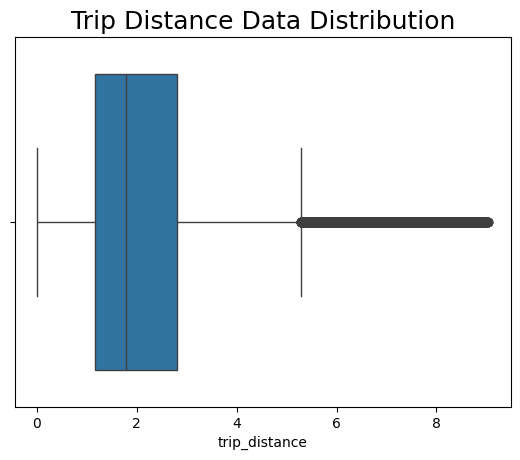

In [573]:
sns.boxplot(data = NY, x = 'trip_distance')
plt.title('Trip Distance Data Distribution',size=18)
plt.show()

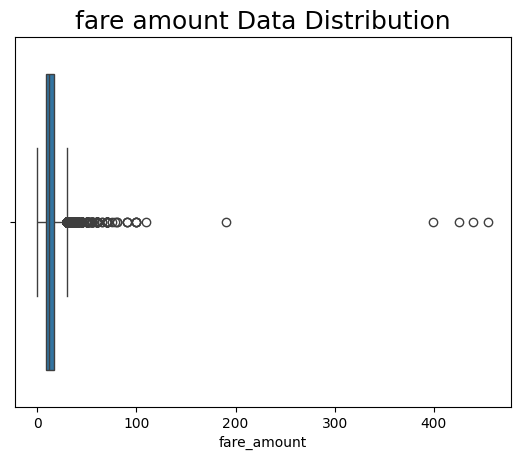

In [575]:
sns.boxplot(data = NY, x = 'fare_amount')
plt.title('fare amount Data Distribution',size=18)
plt.show()

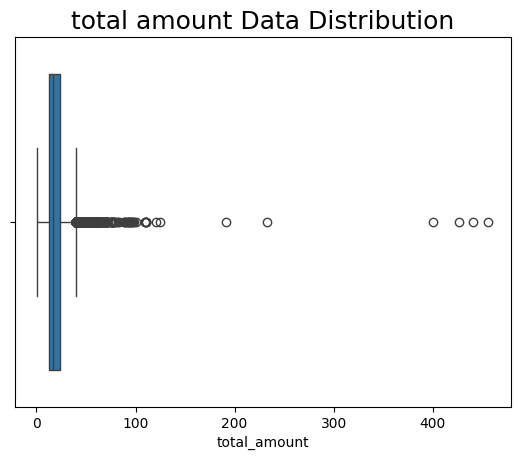

In [577]:
sns.boxplot(data = NY, x = 'total_amount')
plt.title('total amount Data Distribution',size=18)
plt.show()

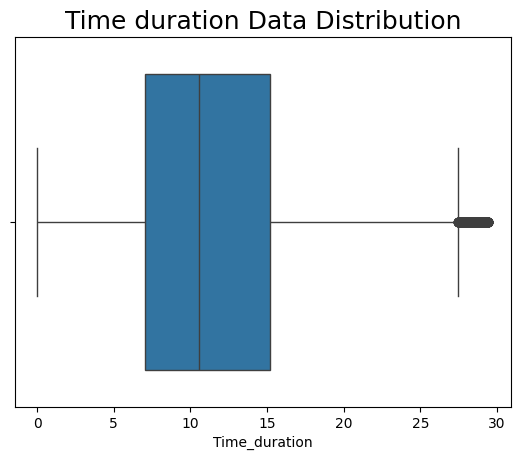

In [578]:
sns.boxplot(data = NY, x = 'Time_duration')
plt.title('Time duration Data Distribution',size=18)
plt.show()

pada data yang di take out :
1. trip distance terdapat trip yang menunjukan perjalanan terdapat 1 perjalaan yang jaraknya tidak masuk akal hal tersebut dapat mempengaruhi perhitungan senggi di lakukan take out pada nilai upper saja yang perjalannya 1571.97 mil atau 2528 km
2. time duration terdapat out lier dengan perjalanan 0 menit dan 24 jam hal tersebut tidak dapat di jelaskan karena saat pengecekankeseluruhan data tidak sesuai

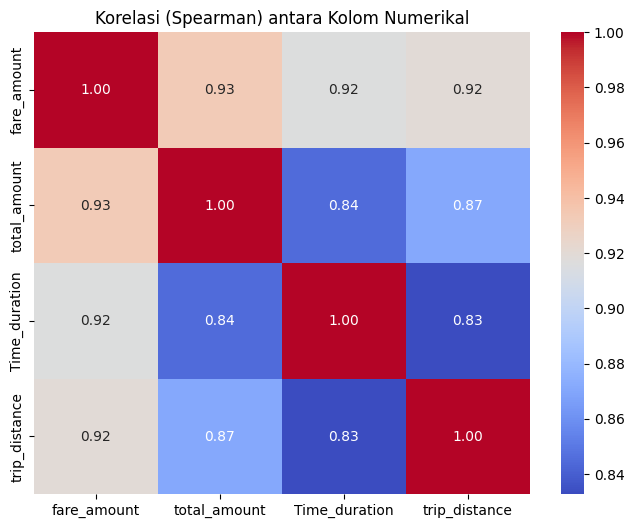

In [586]:
numerical_cols = ['fare_amount', 'total_amount', 'Time_duration','trip_distance']
NY[numerical_cols] = NY[numerical_cols].apply(pd.to_numeric, errors='coerce')
# Hitung korelasi dengan metode Spearman
correlation = NY[numerical_cols].corr(method='spearman')

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi (Spearman) antara Kolom Numerikal')
plt.show()

C:\Users\muhta\AppData\Local\Temp\ipykernel_22272\3902380845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_revenue.index, y=hourly_revenue.values, palette='viridis')


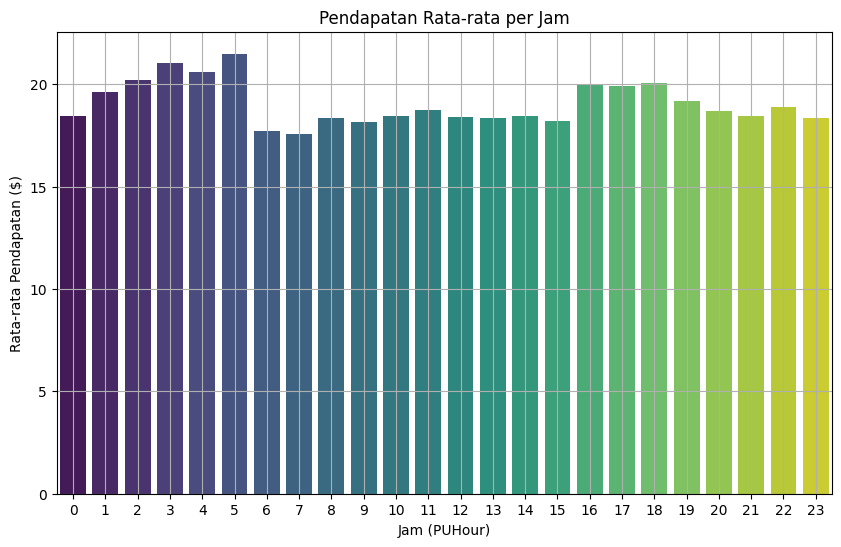

In [582]:
# Hitung pendapatan rata-rata per jam
hourly_revenue = NY.groupby('PUHour')['total_amount'].mean()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_revenue.index, y=hourly_revenue.values, palette='viridis')
plt.title('Pendapatan Rata-rata per Jam')
plt.xlabel('Jam (PUHour)')
plt.ylabel('Rata-rata Pendapatan ($)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


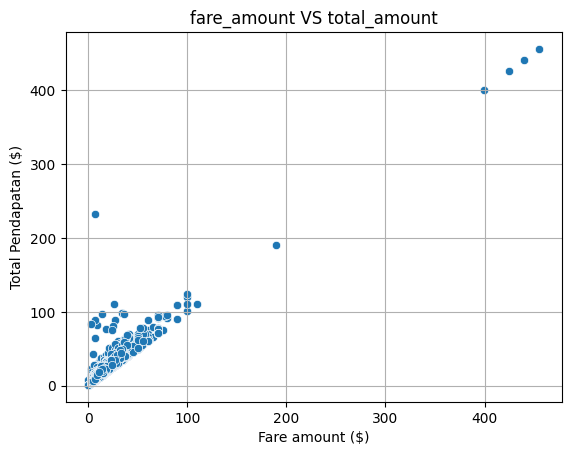

In [587]:
sns.scatterplot(NY, x = 'fare_amount', y = 'total_amount')
plt.title('fare_amount VS total_amount')
plt.xlabel('Fare amount ($)')
plt.ylabel('Total Pendapatan ($)')
plt.grid()
plt.show()

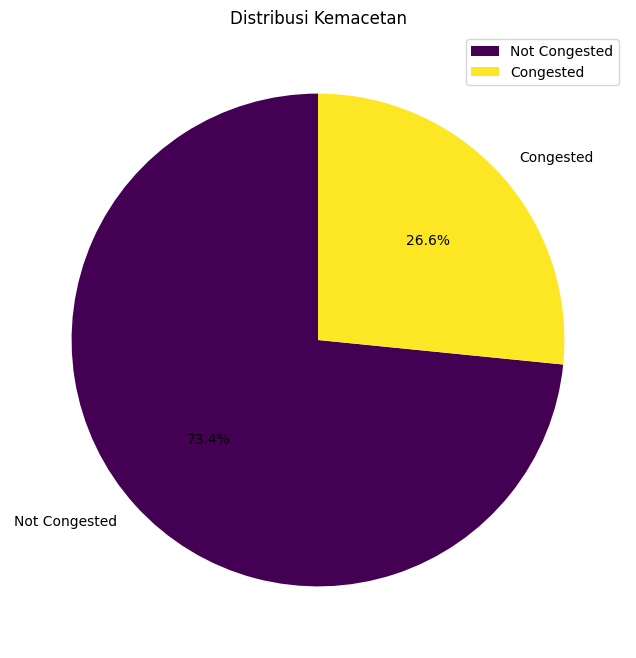

In [ ]:
# Menghitung distribusi data berdasarkan traffic_congestion
congestion_distribution = NY['traffic_congestion'].value_counts()
# Visualisasi Pie Chart
plt.figure(figsize=(8, 8))
congestion_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', legend=True)
plt.title('Distribusi Kemacetan')
plt.ylabel('')  # Menghilangkan label sumbu Y
plt.show()



In [585]:
NY.head()


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_type,congestion_surcharge,Time_duration,pickup_day,dropoff_day,PUHour,DayType,RushHour,PUZone,DOZone,PUBoroughZone,DOBoroughZone,traffic_congestion
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,2.58,14.9,24.18,1.0,2.75,11.016667,Sunday,Sunday,0,H,NonRushHour,Morningside Heights,Lincoln Square West,Manhattan,Manhattan,Congested
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.81,10.7,15.84,1.0,0.00,6.766667,Sunday,Sunday,0,H,NonRushHour,Bloomingdale,Central Park,Manhattan,Manhattan,Not Congested
3,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.30,6.5,10.20,1.0,0.00,5.816667,Sunday,Sunday,0,H,NonRushHour,Central Harlem,Upper West Side North,Manhattan,Manhattan,Not Congested
4,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.10,6.0,8.00,1.0,0.00,5.966667,Sunday,Sunday,0,H,NonRushHour,Central Harlem,East Harlem North,Manhattan,Manhattan,Not Congested
5,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,2.78,17.7,22.95,1.0,2.75,17.550000,Sunday,Sunday,0,H,NonRushHour,Central Harlem,Yorkville East,Manhattan,Manhattan,Congested


## **Conckusion**
- Pada Top 10 lokasi rata-rata pick up paling ramai kota New York adalah kita mengetahui bahwa East Harlem North & East Harlem South merupakan 2 lokasi pick up paling banyak yang memiliki perbedaan yang cukup jauh dengan lainnya.
- East Harlem North & East Harlem South merupakan lokasi pick up dan drop off paling ramai karena dua lokasi tersebut masih ke dalam Top 10 teratas kelasifikasi tersebut. dapat di asumsikan bahwa lokasi tersebut merupakan lokasi sibuk
- Rush hour atau jam sibuk di kategorikan berdasarkan banyaknya jam trip yang paling banyak di lakukan di jam 3 hingga jam 8
- Rush Hour yang hanya memiliki 4 kategori mencerminkan bahwa trip di jam rush yang cukup banyak di angka 14000 sedangkan trip pada Non rush hour yang memiliki waktu 20 jam yang jika di kalkulasikan terdapat 5 kali lipat perbedaanya.
- hubungan total_amount dengan ketiga fariable besar bisa di asumsikan jika jarak dan waktu tinggi maka akan mempengaruhi total amount dan fare amount


## **Action Recommendation**
Berdasarkan analisis data yang telah dilakukan, kami menyarankan beberapa langkah untuk meningkatkan efisiensi armada taksi dan memaksimalkan pendapatan:
Fokus pada Lokasi Ramai:
- Identifikasi Lokasi Strategis: Kita sudah menemukan beberapa lokasi di Manhattan, terutama East Harlem, yang sangat ramai permintaan taksinya.
- Konsentrasi Armada: Sebaiknya kita kumpulkan lebih banyak taksi di lokasi-lokasi ramai ini, terutama saat jam sibuk.

Manfaatkan Waktu Sebelum Jam Sibuk:
- Promosi Menarik: Kita bisa menawarkan harga spesial atau promo menarik untuk penumpang yang ingin berangkat dari lokasi yang sepi menuju lokasi yang ramai, terutama satu jam sebelum jam sibuk dimulai.
- Tujuan: Tujuannya adalah untuk mengisi waktu luang pengemudi sebelum mereka tiba di lokasi ramai, sehingga mereka siap melayani permintaan yang tinggi saat jam sibuk.

Sesuaikan Harga:
- Harga Fleksibel: Kita bisa menerapkan harga yang berbeda-beda tergantung pada lokasi penjemputan dan tujuan, serta waktu perjalanan.
- Harga Khusus Jam Sibuk: Kita bisa menaikkan harga sedikit pada jam-jam sibuk untuk memanfaatkan permintaan yang tinggi.

Evaluasi dan Penyesuaian:
- Pantau Kinerja: Kita perlu terus memantau kinerja strategi ini dengan melihat data seperti jumlah penumpang, pendapatan, dan waktu tunggu.
- Lakukan Penyesuaian: Jika ada perubahan dalam pola permintaan atau kondisi lalu lintas, kita perlu menyesuaikan strategi kita.